In [1]:
!conda install -c conda-forge lifelines

     |████████████████████████████████| 337kB 1.0MB/s eta 0:00:01
     |████████████████████████████████| 112kB 51.4MB/s eta 0:00:01
     |████████████████████████████████| 829kB 29.5MB/s eta 0:00:01
  Stored in directory: /home/scalefreeus/.cache/pip/wheels/42/62/66/1121afe23ff96af4e452e0d15e68761e3f605952ee075ca99f
  ERROR: Complete output from command /home/scalefreeus/anaconda3/envs/peanuts/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/tmp/pip-install-jrowg8ss/bottleneck/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-frtyb3x2 --python-tag cp37:
  ERROR: running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.7
  creating build/lib.linux-x86_64-3.7/bottleneck
  copying bottleneck/__init__.py -> build/lib.linux-x86_64-3.7/bottleneck
  copying bottleneck/version.p

ERROR: Command "/home/scalefreeus/anaconda3/envs/peanuts/bin/python -u -c 'import setuptools, tokenize;__file__='"'"'/tmp/pip-install-jrowg8ss/bottleneck/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-ytjqukj1/install-record.txt --single-version-externally-managed --compile" failed with error code 1 in /tmp/pip-install-jrowg8ss/bottleneck/


In [1]:
from lifelines import KaplanMeierFitter
import pandas as pd
import numpy as np
import scipy.stats as stats

df = pd.read_csv("data/7_ovrian_cancer_survival_data.csv")
df.head()

,id,treatment,month,death,age,residual,condition,time
0,1,1,2,1,72,2,1,59
1,2,1,3,1,74,2,1,115
2,3,1,5,1,66,2,2,156
3,4,2,14,0,53,2,1,421
4,5,1,14,1,50,2,1,431


In [2]:
groups = df['treatment']
i1 = (groups == 1) ## group i1, having the pandas series for the 1st cohort
i2 = (groups == 2) ## group i2, having the pandas series for the 2st cohort

T = df['month']
E = df['death']

          removed  observed  censored  entrance  at_risk
event_at                                                
0.0             0         0         0        13       13
2.0             1         1         0         0       13
3.0             1         1         0         0       12
5.0             1         1         0         0       11
8.0             1         1         0         0       10
11.0            1         1         0         0        9
14.0            2         1         1         0        8
15.0            1         0         1         0        6
21.0            1         1         0         0        5
26.0            1         0         1         0        4
28.0            1         0         1         0        3
34.0            1         0         1         0        2
36.0            1         0         1         0        1
          Standard
timeline          
0.0       1.000000
2.0       0.923077
3.0       0.846154
5.0       0.769231
8.0       0.692308
11.0      0.

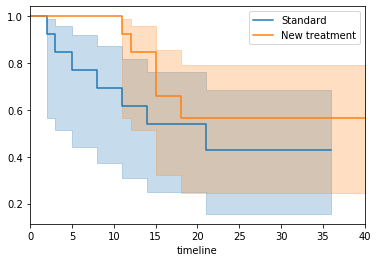

In [35]:
import matplotlib as plt

kmf1 = KaplanMeierFitter() ## instantiate the class to create an object

## fit the model for 1st cohort
kmf1.fit(T[i1], E[i1], label='Standard')
print(kmf1.event_table)
print(1- kmf1.cumulative_density_)
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label='New treatment')
print(kmf1.event_table)
print(1- kmf1.cumulative_density_)
kmf1.plot(ax=a1)

표준 치료법의 2년 생존융은 43.1%, 새 치료법의 2년 생존율은 56.4%이다. 

## Log-rank test

In [37]:
from lifelines.statistics import logrank_test

results = logrank_test(T[i1], T[i2], event_observed_A=E[i1], event_observed_B=E[i2])
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic    p  -log2(p)
           1.12 0.29      1.78


H<sub>0</sub> : 두 군의 생존곡선은 같다.  
H<sub>1</sub> : 두 군의 생존곡선은 다르다.  
p=0.291 > 0.05 이므로 H<sub>0</sub> 채택  
--> 두 군의 생존곡선은 다르다고 말할 수 없다. 